# TD5 : Classification hiérarchique

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.manifold import MDS
from src.utils import add_labels, plot_dendrogram, plot_Shepard

In [2]:
# Chargement du jeu de données

mutations = pd.read_csv("data/mutations2.csv", index_col=0)
mutations


,Man,Monkey,Dog,Horse,Donkey,Pig,Rabbit,Kangaroo,Pekin Duck,Pigeon,Chicken,King Penguin,Snapping Turtle,Rattlesnake,Tuna,Screwworm Fly,Moth,Bakers Mould,Bread Yeast,Skin Fungus
Man,0,1,13,17,16,13,12,12,17,16,18,18,19,20,31,33,36,63,56,66
Monkey,1,0,12,16,15,12,11,13,16,15,17,17,18,21,32,32,35,62,57,65
Dog,13,12,0,10,8,4,6,7,12,12,14,14,13,30,29,24,28,64,61,66
Horse,17,16,10,0,1,5,11,11,16,16,16,17,16,32,27,24,33,64,60,68
Donkey,16,15,8,1,0,4,10,12,15,15,15,16,15,31,26,25,32,64,59,67
Pig,13,12,4,5,4,0,6,7,13,13,13,14,13,30,25,26,31,64,59,67
Rabbit,12,11,6,11,10,6,0,7,10,8,11,11,11,25,26,23,29,62,59,67
Kangaroo,12,13,7,11,12,7,7,0,14,14,15,13,14,30,27,26,31,66,58,68
Pekin Duck,17,16,12,16,15,13,10,14,0,3,3,3,7,24,27,26,30,59,62,66
Pigeon,16,15,12,16,15,13,8,14,3,0,4,4,8,24,27,26,30,59,62,66


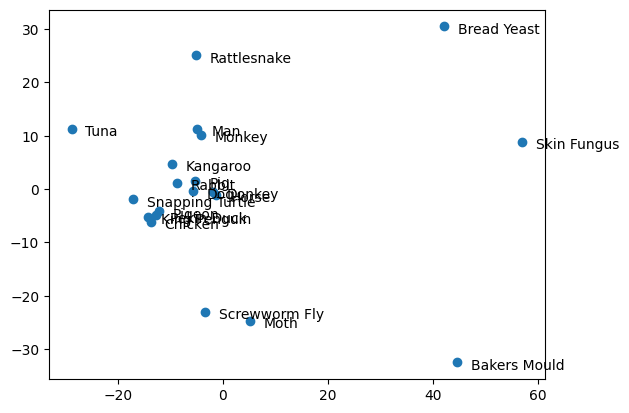

In [63]:
mds = MDS(n_components=2, dissimilarity='precomputed')
dist = mds.fit_transform(mutations)

plt.scatter(*dist.T)
add_labels(dist[:, 0], dist[:, 1], mutations.index)
plt.show()

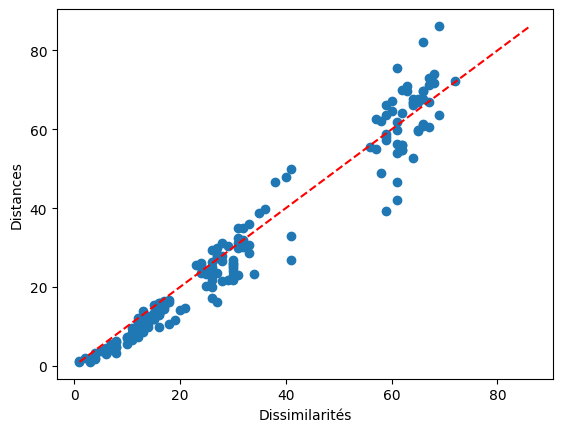

In [33]:
dists_2D = plot_Shepard(mds, plot = True)

1566.3006903110959
620.668575638977
275.35699821734795


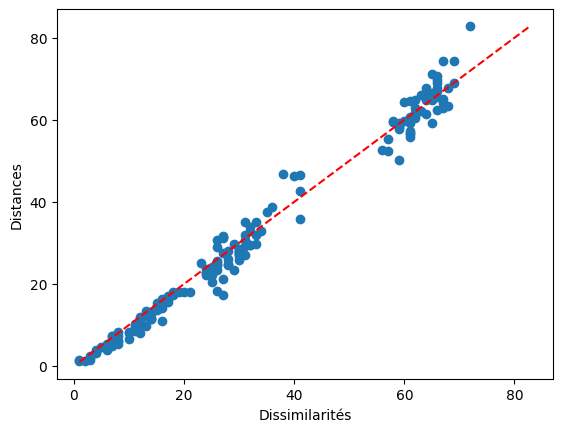

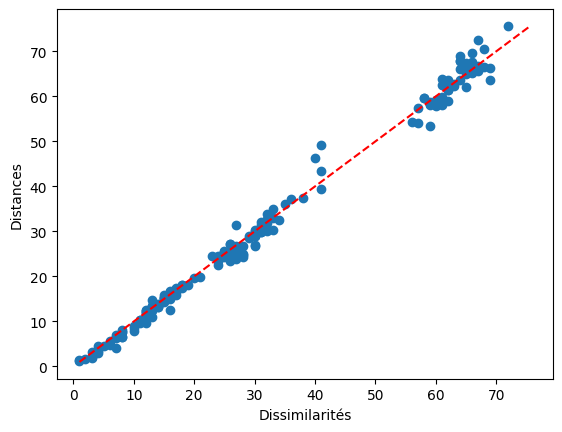

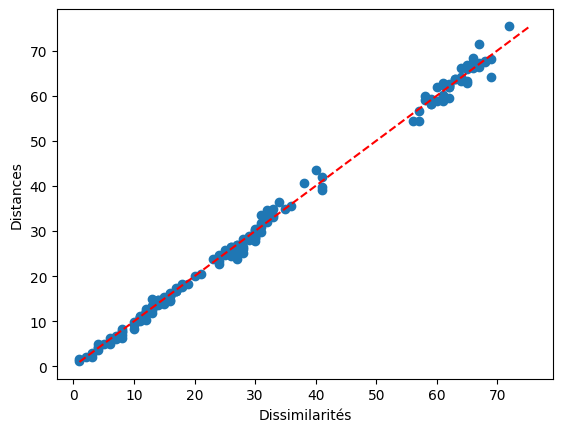

In [17]:
for index, d in enumerate(range(3, 6)):
    mds = MDS(n_components=d, dissimilarity='precomputed')
    coord = mds.fit_transform(mutations)
    dists = plot_Shepard(mds, plot = True)
    stress = np.sum((dists[1] - dists[0])**2)
    print(stress)

## 1.2 Classification ascendante hiérarchique

In [66]:
import seaborn as sn
iris = sn.load_dataset("iris")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


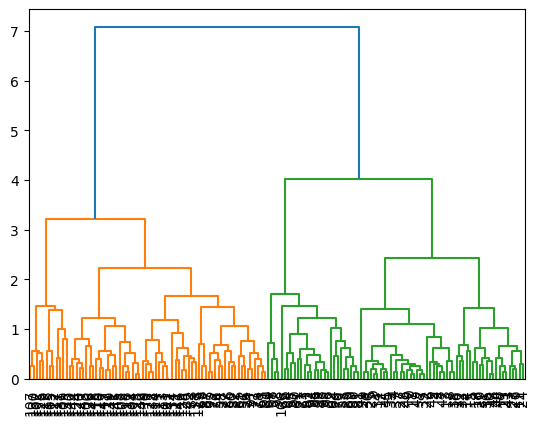

In [28]:
from sklearn.cluster import AgglomerativeClustering

X = iris.drop(columns="species")
cls = AgglomerativeClustering(linkage="complete", metric="euclidean", distance_threshold=0, n_clusters=None)
cls.fit(X)

plot_dendrogram(cls)

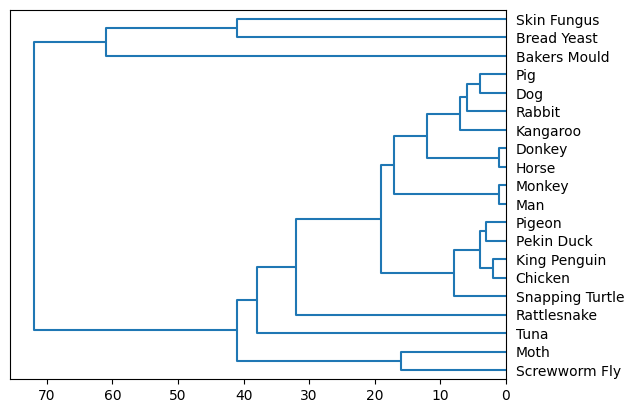

In [50]:
model = AgglomerativeClustering(
metric="precomputed", linkage="complete", distance_threshold=0, n_clusters=None
).fit(mutations)

plot_dendrogram(model, color_threshold=1, labels=mutations.index, orientation="left")
plt.show()

### Question 8

<Axes: >

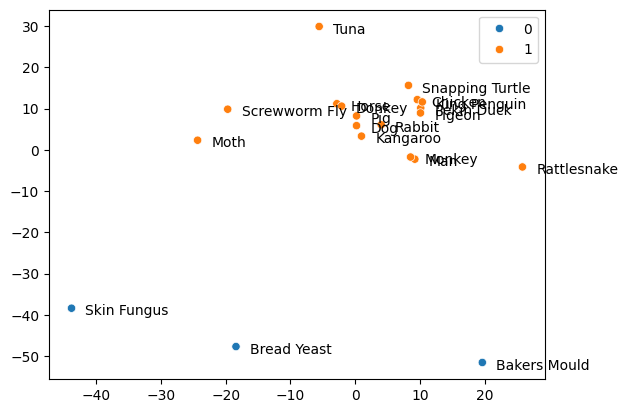

In [72]:
model = AgglomerativeClustering(metric="precomputed", linkage="complete", n_clusters=2).fit(mutations)
aftd = MDS(n_components=2, dissimilarity="precomputed")
dist = aftd.fit_transform(mutations)

sn.scatterplot(x=dist[:, 0], y=dist[:, 1], hue=model.labels_)
add_labels(dist[:, 0], dist[:, 1], mutations.index)

### ACP des données Iris

<Axes: >

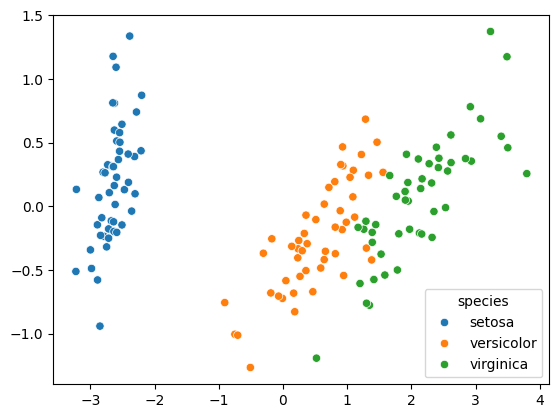

In [69]:
from sklearn.decomposition import PCA
ACP = PCA(n_components=2)
X_new = ACP.fit_transform(X)

sn.scatterplot(x=X_new[:, 0], y=X_new[:, 1], hue=iris.species)